In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_cxCGjdN.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_dPrl03o.zip
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_mPTIhGU.zip

--2020-10-04 14:08:13--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_cxCGjdN.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.64
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87997 (86K) [text/csv]
Saving to: ‘sample_submission_cxCGjdN.csv’

sample_submission_c 100%[===================>]  85.93K   184KB/s    in 0.5s    

2020-10-04 14:08:15 (184 KB/s) - ‘sample_submission_cxCGjdN.csv’ saved [87997/87997]

--2020-10-04 14:08:15--  https://datahack-prod.s3.amazonaws.com/train_file/train_dPrl03o.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.112
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15177985 (14M) [application/zip]
Saving to: ‘trai

In [ ]:
!unzip test_mPTIhGU.zip
!unzip train_dPrl03o.zip

Archive:  test_mPTIhGU.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
Archive:  train_dPrl03o.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission_cxCGjdN.csv')

In [ ]:
train.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,847.0,4536.0,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",74311.0,69.0,161.0,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,3557.0


In [ ]:
test.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA
3,494,Measuring RPM with a spectrum analyzer mobile app,Matthias Wandel,26.0,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",89664.0,145.0,324.0,Using a spectrum analyzer app to analyze the s...,US
4,73942,Anchor Anasuya responded on Phone breaking iss...,AVA Creative thoughts,22.0,2018-02-06,"anasuya responded|""anasuya issue""|""anasuya bor...",53526.0,357.0,153.0,Welcome to AVA Creative thoughts Channel Subsc...,IN


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(video_id         0
 title            0
 channel_title    0
 category_id      0
 publish_date     0
 tags             0
 views            0
 dislikes         0
 comment_count    0
 description      0
 country_code     0
 likes            0
 dtype: int64, video_id         0
 title            0
 channel_title    0
 category_id      0
 publish_date     0
 tags             0
 views            0
 dislikes         0
 comment_count    0
 description      0
 country_code     0
 dtype: int64, (26061, 12), (11170, 11), video_id           int64
 title             object
 channel_title     object
 category_id      float64
 publish_date      object
 tags              object
 views            float64
 dislikes         float64
 comment_count    float64
 description       object
 country_code      object
 likes            float64
 dtype: object)

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
k=['publish_date']
for i in k:
  df[i] = pd.to_datetime(df[i])

In [ ]:
for i in k:
  df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] =df[i].dt.dayofweek
  df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
for i in k:
  del df[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['channel_title'] = le.fit_transform(df['channel_title'])
df['channel_title']=df['channel_title']+1
le = LabelEncoder()
df['country_code'] = le.fit_transform(df['country_code'])
df['country_code']=df['country_code']+1

In [ ]:
df.nunique()

video_id                   37231
title                      37127
channel_title               6979
category_id                   17
tags                       30362
views                      35792
dislikes                    3123
comment_count               5937
description                33160
country_code                   4
likes                      12134
publish_date_year             13
publish_date_day              31
publish_date_weekofyear       51
publish_date_month            12
publish_date_dayofweek         7
publish_date_weekend           2
dtype: int64

In [ ]:
df['tags_len']=df['tags'].apply(lambda x: len(str(x).split("|")))

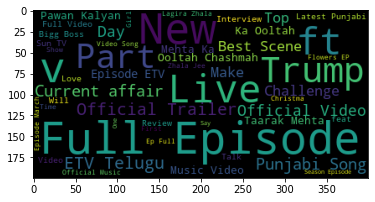

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['title']))
plt.imshow(wc)

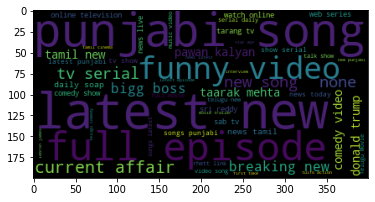

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['tags']))
plt.imshow(wc)

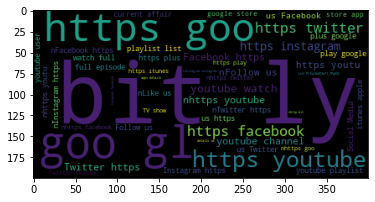

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['description']))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=1000, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,4), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['title']).todense())
df_info.columns = ['title_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=100, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,4), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['tags']).todense())
df_info.columns = ['tags_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=100, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,4), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['description']).todense())
df_info.columns = ['description_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
df['title_numerics'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['title_upper'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['tags_numerics'] = df['tags'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['tags_upper'] = df['tags'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['description_numerics'] = df['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['description_upper'] = df['description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


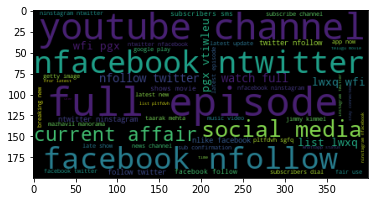

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

df['title'] = df['title'].apply(clean_text)
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['title']))
plt.imshow(wc)
df['tags'] = df['tags'].apply(clean_text)
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['tags']))
plt.imshow(wc)
df['description'] = df['description'].apply(clean_text)
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(df['description']))
plt.imshow(wc)

In [ ]:
import string
punctuation=string.punctuation
df['title_word_count']=df['title'].apply(lambda x: len(str(x).split(" ")))
df['title_char_count'] = df['title'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

df['title_avg_word'] = df['title'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['title_stopwords'] = df['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['title_word_density'] = df['title_char_count'] / (df['title_word_count']+1)

import string
punctuation=string.punctuation
df['tags_word_count']=df['tags'].apply(lambda x: len(str(x).split(" ")))
df['tags_char_count'] = df['tags'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

df['tags_avg_word'] = df['tags'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['tags_stopwords'] = df['tags'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['tags_word_density'] = df['tags_char_count'] / (df['tags_word_count']+1)

import string
punctuation=string.punctuation
df['description_word_count']=df['description'].apply(lambda x: len(str(x).split(" ")))
df['description_char_count'] = df['description'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

df['description_avg_word'] = df['description'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['description_stopwords'] = df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['description_word_density'] = df['description_char_count'] / (df['description_word_count']+1)

In [ ]:
j=[]
for i in df['title']:
  j.append(len(i))
df['title_len']=j
j=[]
for i in df['tags']:
  j.append(len(i))
df['tags_len']=j
j=[]
for i in df['description']:
  j.append(len(i))
df['description_len']=j

In [ ]:
from textblob import TextBlob
df['title_polarity'] = df.apply(lambda x: TextBlob(x['title']).sentiment.polarity, axis=1)
df['title_subjectivity'] = df.apply(lambda x: TextBlob(x['title']).sentiment.subjectivity, axis=1)
df['tags_polarity'] = df.apply(lambda x: TextBlob(x['tags']).sentiment.polarity, axis=1)
df['tags_subjectivity'] = df.apply(lambda x: TextBlob(x['tags']).sentiment.subjectivity, axis=1)
df['description_polarity'] = df.apply(lambda x: TextBlob(x['description']).sentiment.polarity, axis=1)
df['description_subjectivity'] = df.apply(lambda x: TextBlob(x['description']).sentiment.subjectivity, axis=1)

In [ ]:
del df['title']
del df['tags']
del df['description']

In [ ]:
train = df[df['likes'].isnull()==False]
test = df[df['likes'].isnull()==True]
del test['likes']

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_df=train
test_df=test

In [ ]:
X = train_df.drop(labels=['likes'], axis=1)
y = train_df['likes'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((22151, 1243), (22151,), (3910, 1243), (3910,))

In [ ]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_error(y_cv, y_pred_lgbm)))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 19947.2
Early stopping, best iteration is:
[109]	valid_0's rmse: 19922.6
RMSLE: 19922.57011239143


In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

AttributeError: ignored

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  22313.697859977


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  10715.675361229058


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  39003.468715044604


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  18407.307643579843


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  16778.51438904885


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21902.738798933526


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  27311.34406695439


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  50177.45507008496


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  30783.020309467036


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  36910.45695565451


In [ ]:
np.mean(errlgb)

27430.367916997377

In [ ]:
final = np.mean(y_pred_totlgb,0).round()
final

array([  980.,  3082.,  1508., ...,  8747., 14178.,  6049.])

In [ ]:
sub['likes']=(final)

In [ ]:
x=[]
for i in sub['likes']:
  if i<0:
    x.append(0)
  else:
    x.append(i)

In [ ]:
sub['likes']=x

In [ ]:
sub.to_csv('hack5.csv',index=False)